In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats



In [31]:
intrin1 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/eventlist_intrinsics_run1.txt',delimiter=' ')
intrin2 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/eventlist_intrinsics_run2.txt',delimiter=' ')
intrin3 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/eventlist_intrinsics_run3.txt',delimiter=' ')




In [67]:
intrin = pd.concat((intrin1,intrin2,intrin3)).query('sigprobavg>0.95 and Enu_1e1p<1200')

In [68]:
fracerr = (intrin['Enu_1e1p'] - intrin['EnuTrue'])/intrin['EnuTrue']

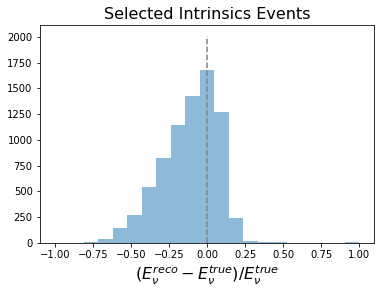

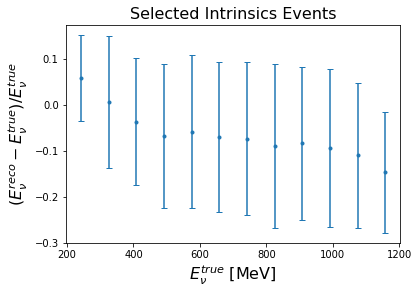

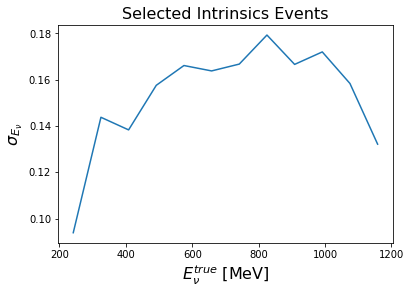

In [74]:
n,_,_ = plt.hist(fracerr,range=(-1,1),bins=21,alpha=0.5)
plt.xlabel(r'$(E_\nu^{reco} - E_\nu^{true})/E_\nu^{true}$',fontsize=16)
plt.title('Selected Intrinsics Events',fontsize=16)
plt.plot([0,0],[0,1.2*max(n)],linestyle='--',color='grey')
plt.show()

x = intrin['EnuTrue']
y=fracerr

means_result = scipy.stats.binned_statistic(x, [y, y**2], bins=12, range=(200,1200), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.',capsize=3)
plt.ylabel(r'$(E_\nu^{reco} - E_\nu^{true})/E_\nu^{true}$',fontsize=16)
plt.xlabel(r'$E_\nu^{true}$ [MeV]',fontsize=16)
plt.title('Selected Intrinsics Events',fontsize=16)
plt.show()

plt.plot(bin_centers, standard_deviations)
plt.ylabel(r'$\sigma_{E_\nu}$',fontsize=16)
plt.xlabel(r'$E_\nu^{true}$ [MeV]',fontsize=16)
plt.title('Selected Intrinsics Events',fontsize=16)
plt.show()

